In [1]:
! git clone https://github.com/meituan/YOLOv6.git

Cloning into 'YOLOv6'...
remote: Enumerating objects: 1692, done.
remote: Counting objects: 100% (1692/1692), done.
remote: Compressing objects: 100% (768/768), done.
remote: Total 1692 (delta 963), reused 1579 (delta 894), pack-reused 0
Receiving objects: 100% (1692/1692), 14.96 MiB | 32.11 MiB/s, done.
Resolving deltas: 100% (963/963), done.


In [4]:
%cd YOLOv6

[Errno 2] No such file or directory: 'YOLOv6'
/content/YOLOv6


In [5]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 38.4 MB/s 
     |████████████████████████████████| 235 kB 54.6 MB/s 
     |████████████████████████████████| 51 kB 9.2 MB/s 


In [6]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip "/content/drive/MyDrive/custom_dataset.zip" -d "/content/dataset"

Archive:  /content/drive/MyDrive/custom_dataset.zip
   creating: /content/dataset/custom_dataset/
   creating: /content/dataset/custom_dataset/images/
   creating: /content/dataset/custom_dataset/images/test/
  inflating: /content/dataset/custom_dataset/images/test/images - 2021-11-06T222735.453.jpg  
  inflating: /content/dataset/custom_dataset/images/test/images - 2021-11-06T222741.140.jpg  
  inflating: /content/dataset/custom_dataset/images/test/images - 2021-11-06T222744.616.jpg  
  inflating: /content/dataset/custom_dataset/images/test/images - 2021-11-06T222809.926.jpg  
  inflating: /content/dataset/custom_dataset/images/test/images - 2021-11-06T222812.170.jpg  
  inflating: /content/dataset/custom_dataset/images/test/images - 2021-11-07T000642.166.jpg  
  inflating: /content/dataset/custom_dataset/images/test/images - 2021-11-07T000644.089.jpg  
  inflating: /content/dataset/custom_dataset/images/test/images - 2021-11-07T001241.264.jpg  
  inflating: /content/dataset/custom_da

In [11]:
# Training

!python /content/YOLOv6/tools/train.py --batch 16 --conf /content/YOLOv6/configs/yolov6s.py --data-path /content/dataset/custom_dataset/data.yaml --device 0 --epochs 10 --eval-interval 2

Using 1 GPU for training... 
training args are: Namespace(batch_size=16, check_images=False, check_labels=False, conf_file='/content/YOLOv6/configs/yolov6s.py', data_path='/content/dataset/custom_dataset/data.yaml', device='0', dist_url='env://', epochs=10, eval_final_only=False, eval_interval=2, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp3', workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 986/ labels: 986. 
0.0s for dataset initialization.
Convert to COCO format
100% 246/246 [00:00<00:00, 100939.03it/s]
Convert to COCO format finished. Resutls saved in /content/dataset/custom_dataset/annotations/instances_val.json
Val: Final numbers of valid images: 246/ labels: 246. 
0.1s for dataset initialization.
Model: Model(
  (backbone): EfficientRep(
    (stem): RepVGGBlock(
      (nonlinearity): ReLU(inplace=True)
      (se): Identity()
      (rb

In [12]:
# Evaluation

!python /content/YOLOv6/tools/eval.py --data /content/dataset/custom_dataset/data.yaml  --weights /content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt --device 0

Namespace(batch_size=32, conf_thres=0.001, data='/content/dataset/custom_dataset/data.yaml', device='0', half=False, img_size=640, iou_thres=0.65, name='exp', save_dir='runs/val/', task='val', weights='/content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt')
Loading checkpoint from /content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 44.07
Val: Checking formats of labels with 2 process(es): 
246 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 246/246 [00:00<00:00, 5885.03it/s]
Convert to COCO format
100% 246/246 [00:00<00:00, 158909.41it/s]
Convert to COCO form

In [16]:
# Inference

!python /content/YOLOv6/tools/infer.py --weights /content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt --source /content/dataset/custom_dataset/images/test/image2.jpg --yaml /content/dataset/custom_dataset/data.yaml --device 0 

Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_dir=None, save_img=True, save_txt=False, source='/content/dataset/custom_dataset/images/test/image2.jpg', view_img=False, weights='/content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt', yaml='/content/dataset/custom_dataset/data.yaml')
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 45.03it/s]
Results saved to runs/inference/exp


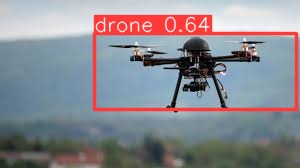

In [18]:
from IPython.display import Image
Image(filename='/content/YOLOv6/runs/inference/image2.jpg', width=500)

In [19]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [20]:
download('/content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>